In [13]:
import pandas as pd
from Operators.evaluation import *

import warnings
warnings.filterwarnings("ignore")

Loading the results from the first gridsearch 

In [14]:
fitness_path = "fitness_logs_gs2"
summary_path = "ga_summary_gs2.csv"

In [15]:
fitness_dfs = load_fitness_logs(fitness_path)

Loaded 9 configurations from 'fitness_logs_gs2'


In [16]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=1.0 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=1.0 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=1.0 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.5 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.1 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.5 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True', 'POP=100 XO=0.5 mut_prob=1.0 mutation=full_position_swap_2teams crossover=cro

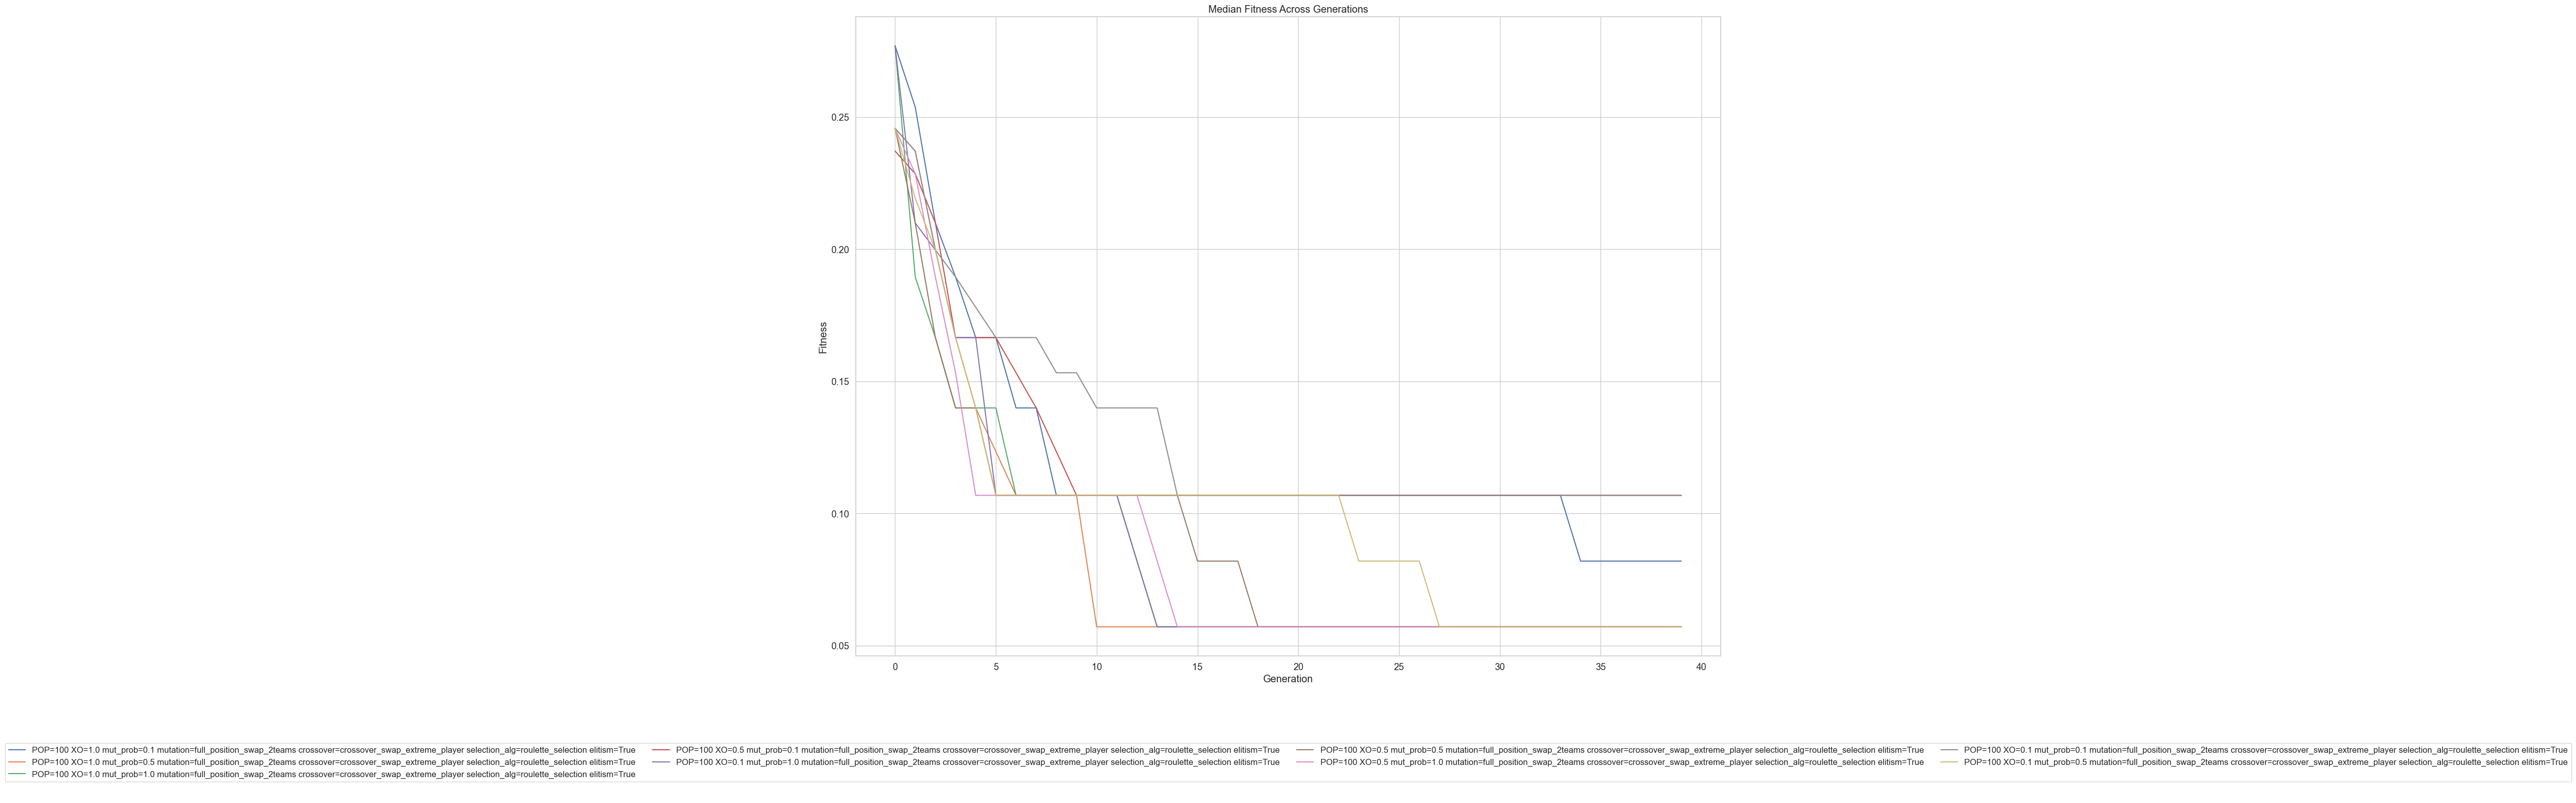

In [17]:
plot_median_fitness_over_gen(fitness_dfs)

<br> 🔍 Key Observations:
Rapid convergence: Most configurations show a steep drop in fitness within the first 10 generations, indicating that the algorithm effectively improves solutions early in the search.

Stabilization: After the initial drop, many configurations plateau, suggesting convergence to a local optimum. This is expected behavior in evolutionary algorithms as diversity decreases.

Best-performing configurations: Some configurations achieve notably lower final fitness values (~0.05), indicating superior search behavior under those settings. These lines often correspond to moderate mutation probabilities (0.5–1.0) and consistent application of elitism and roulette selection.

Flat curves in later generations: For some configurations, fitness improvements stagnate early, which may indicate insufficient exploration or premature convergence. This highlights the importance of maintaining diversity through mutation or alternative selection strategies.

<br> ⚙️ Experimental Notes:
All runs were conducted with a population size of 100.

The mutation operator used was full_position_swap_2teams and the crossover strategy was crossover_swap_extreme_player.

Selection was done using the roulette wheel algorithm, and elitism was enabled in all configurations.

<br> 📈 Improvement Suggestions:
To enhance performance, future runs could explore:

Higher mutation diversity or adaptive mutation rates

Alternative selection methods (e.g., tournament selection)

Delayed convergence through diversity-preserving techniques

## Statistical tests

#### The Friedman test, checks if there’s any significant difference across all configurations,
#### <br> If there are significant difference then  apply the Nemenyi post-hoc test, which compares each pair of configurations


 Friedman Test (non-parametric ANOVA for repeated measures)

Use when: You want to compare 3 or more configurations across repeated runs (e.g., different crossover strategies).

Assumption: Repeated measurements across same conditions.

Output: Tells you if there is a statistically significant difference somewhere in the group.


### Evaluating statistical significance across full hyperparameter configurations
Constraints:
* Same dataset: All configurations are tested on the same dataset
* Same number of runs: Each configuration must have the same number of runs (30)
* Same evaluation metric:  final fitness from each run

Null hypothesis (H₀): All configurations perform equally (no statistically significant difference in performance).

If p < 0.05: You can reject H₀ — at least one configuration performs significantly differently.

In [18]:
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)


Friedman Test Results:
Test Statistic: 52.7593
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


In [19]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=1.0 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True  \
POP=100 XO=1.0 mut_prob=0.1 mutation=full_posit...                                             1.0000                                                                                                      
POP=100 XO=1.0 mut_prob=0.5 mutation=full_posit...                                             0.1359                                                                                                      
POP=100 XO=1.0 mut_prob=1.0 mutation=full_posit...                                             0.4912                                                                                                      
POP=100 XO=0.5 mut_prob=0.1 mutation=full_posit...                                             0.9796                                                

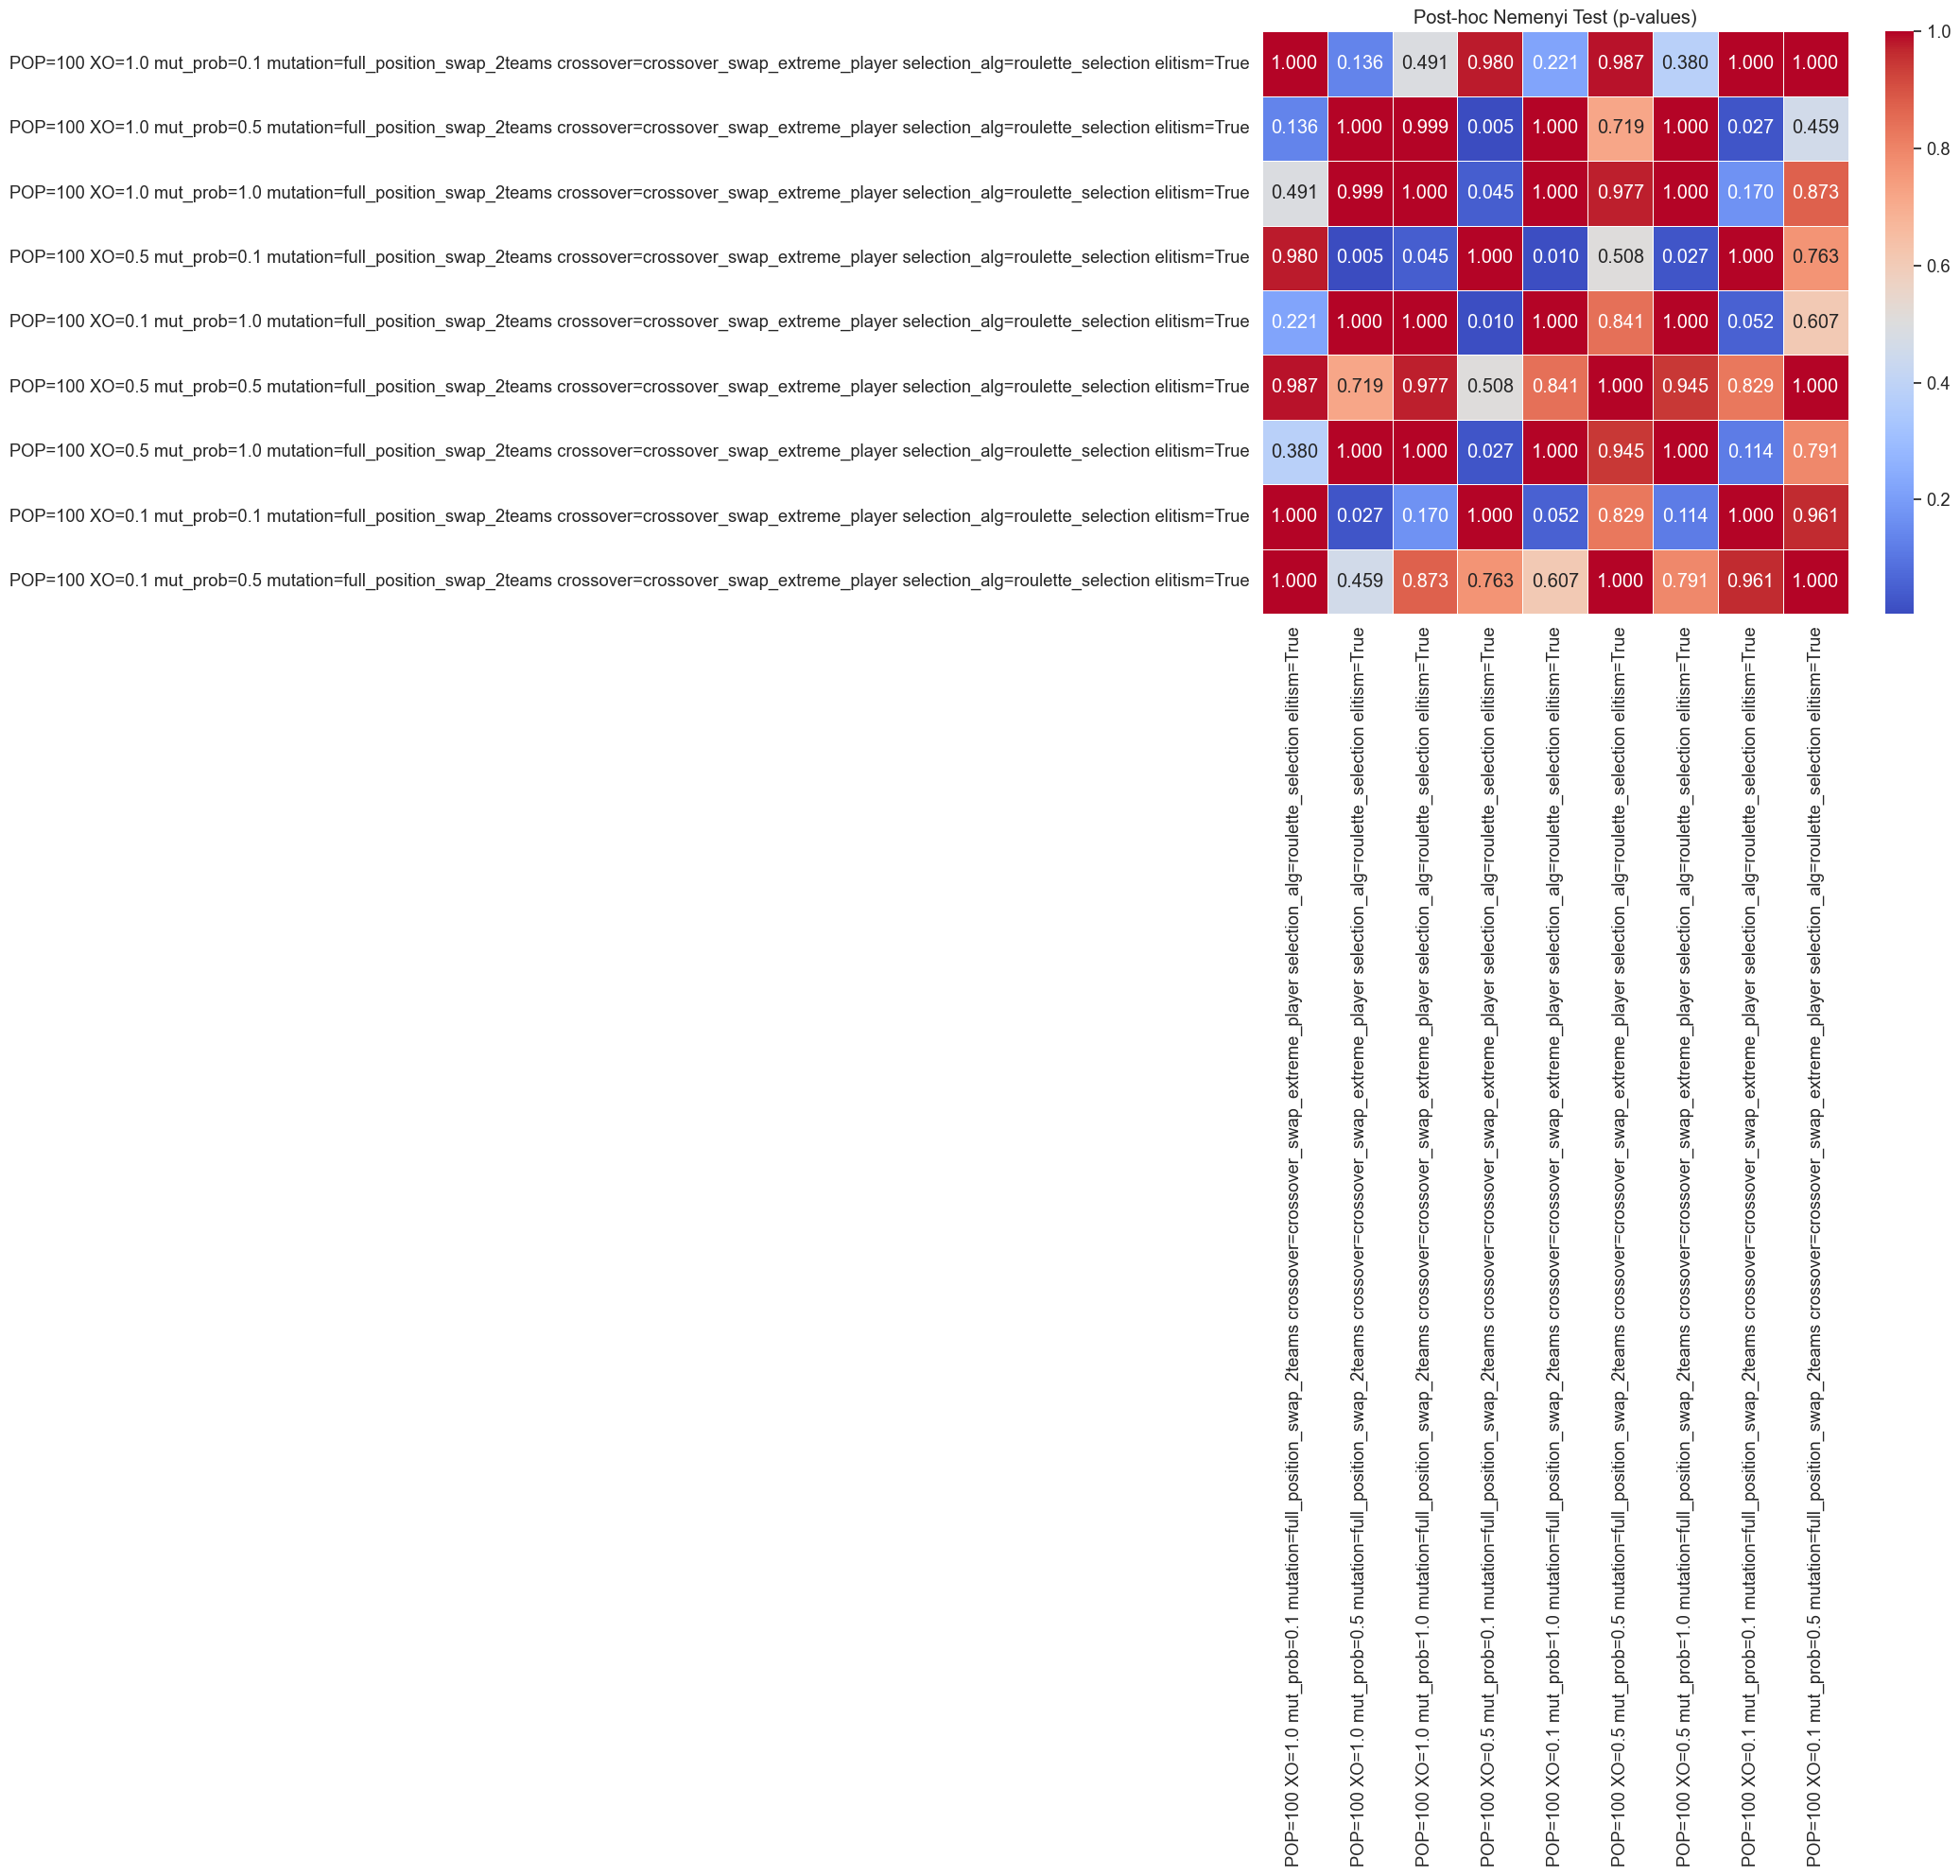

In [20]:
plot_posthoc_heatmap(posthoc_results)

In [21]:
summarize_significant_wins(posthoc_results)

,Significant Wins
POP=100 XO=0.5 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,4
POP=100 XO=1.0 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,2
POP=100 XO=1.0 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=0.1 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=0.5 mut_prob=1.0 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=0.1 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,1
POP=100 XO=1.0 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,0
POP=100 XO=0.5 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,0
POP=100 XO=0.1 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=True,0


The table gives a ranking based not just on performance, but on statistical confidence:
<br> Higher "Significant Wins" → more robust evidence that this configuration is truly better across multiple comparisons.
<br> Helps avoid picking a config just because of random variation in performance.

Config 1: It significantly beat 16 other configurations (with p < 0.05 in the Nemenyi test),
This suggests it’s a strong candidate for the best hyperparameter setup.

| XO Prob | Mut Prob | Significant Wins | Interpretation                                                                   |
| ------- | -------- | ---------------- | -------------------------------------------------------------------------------- |
| 0.5     | 0.1      | **4**            | Best-performing setup among this group. Balanced crossover and light mutation.   |
| 1.0     | 0.5      | 2                | Full crossover, moderate mutation       |
| 0.1     | 1.0      | 1                | Very high mutation rate, low crossover       |
| 0.5     | 1.0      | 1                | High mutation disrupts optimization; still performs slightly better than others. |
| 1.0     | 1.0      | 1                | Full crossover and mutation - likely hurt convergence stability.                         |
| 0.1     | 0.1      | 1                | Very conservative — might not explore enough to consistently win.                |
| 1.0     | 0.1      | 0                | Underperforms — may converge prematurely.                           |
| 0.5     | 0.5      | 0                | Neither strong nor stable — mid-range settings not effective here.               |
| 0.1     | 0.5      | 0                | Low crossover with mid mutation shows weak configuration              |


### Analyzing only the best-performing configurations from ga_summary_gs2.csv

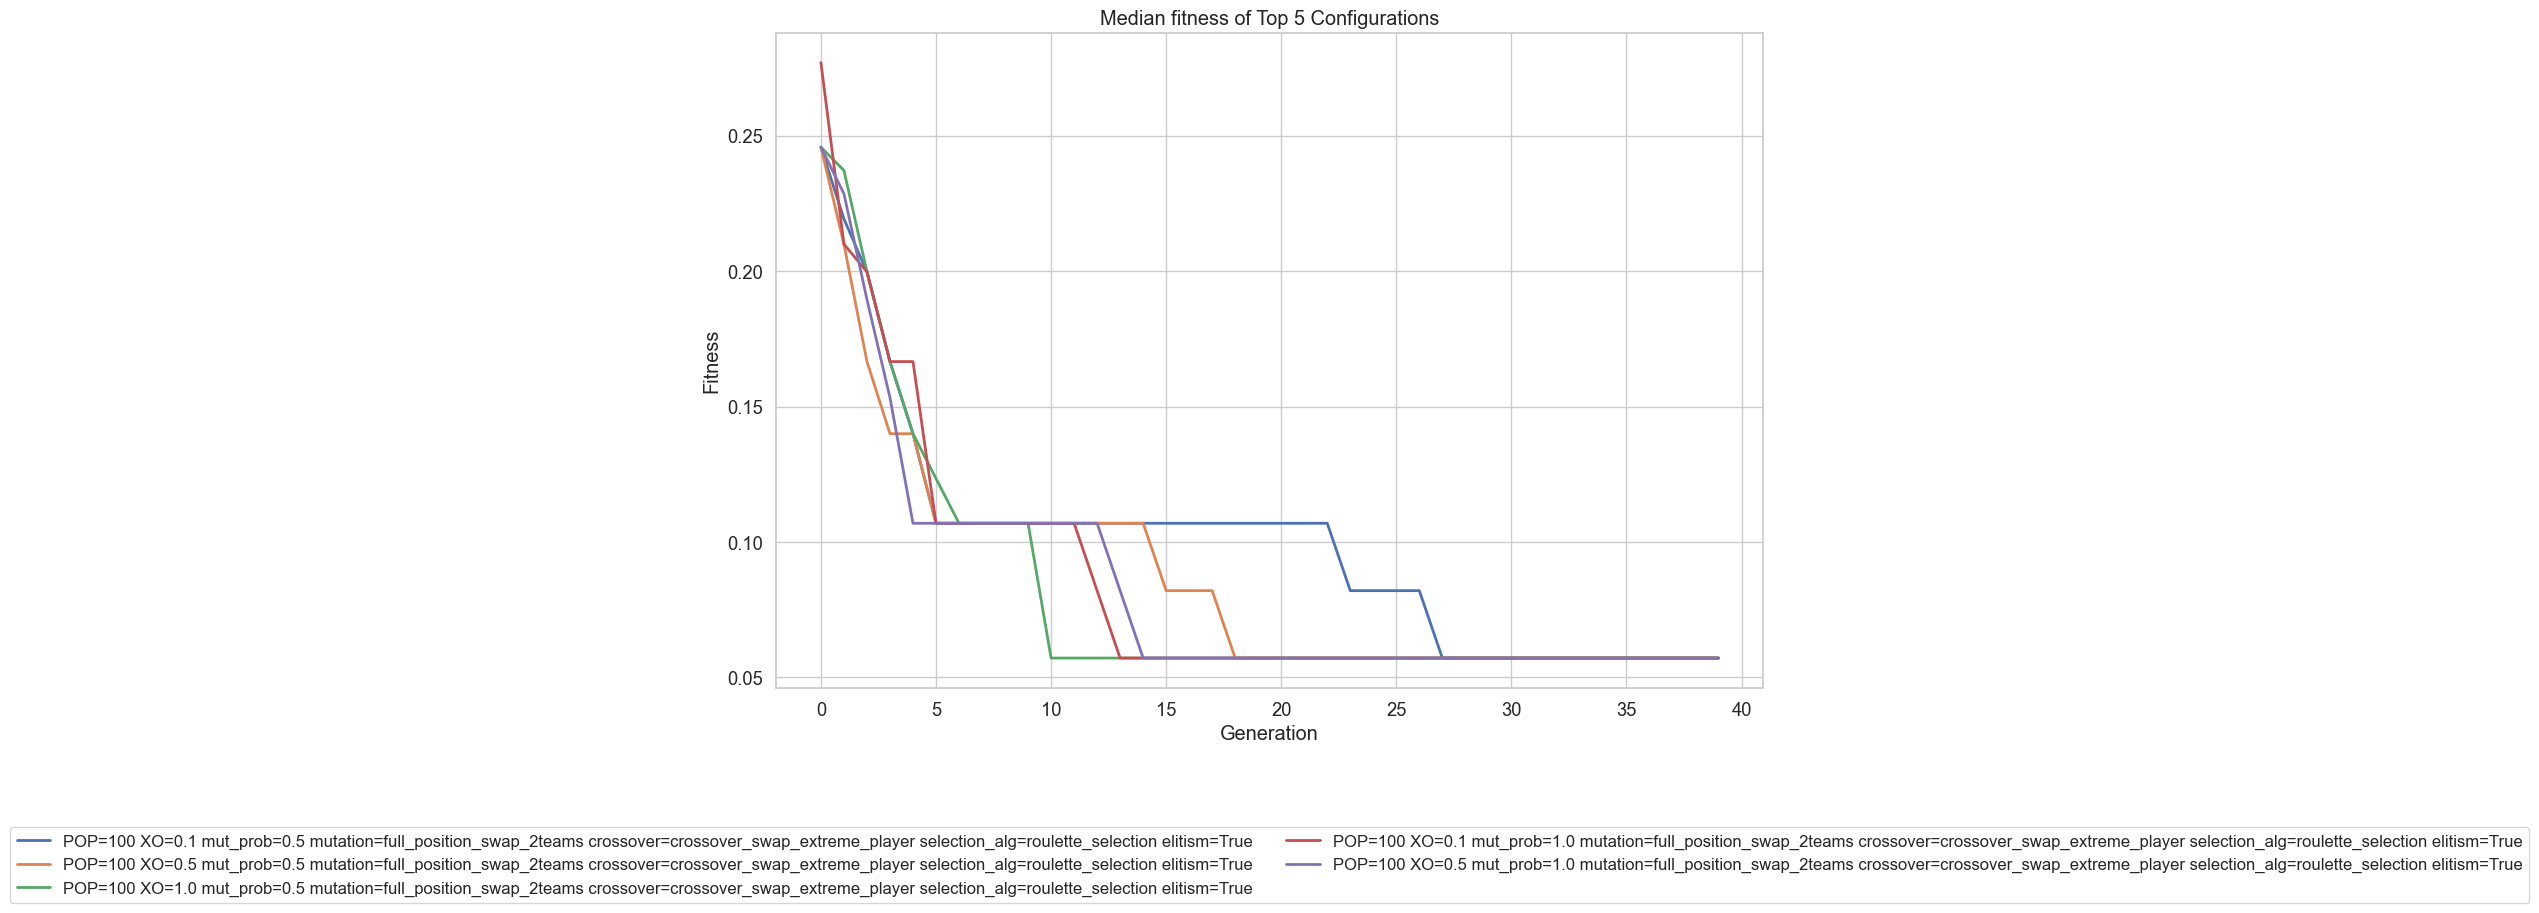

In [22]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=5, metric='median_fitness')

Key Observations:
All configurations exhibit rapid convergence within the first 10 generations.

The best configurations stabilize at a median fitness of ~0.06–0.07.

Configurations with mut_prob = 1.0 tend to reach the lowest fitness levels quickest, suggesting higher mutation rates may improve exploration and lead to better optima.

One or two configurations plateau higher (e.g. ~0.10), indicating early stagnation or suboptimal parameter settings.

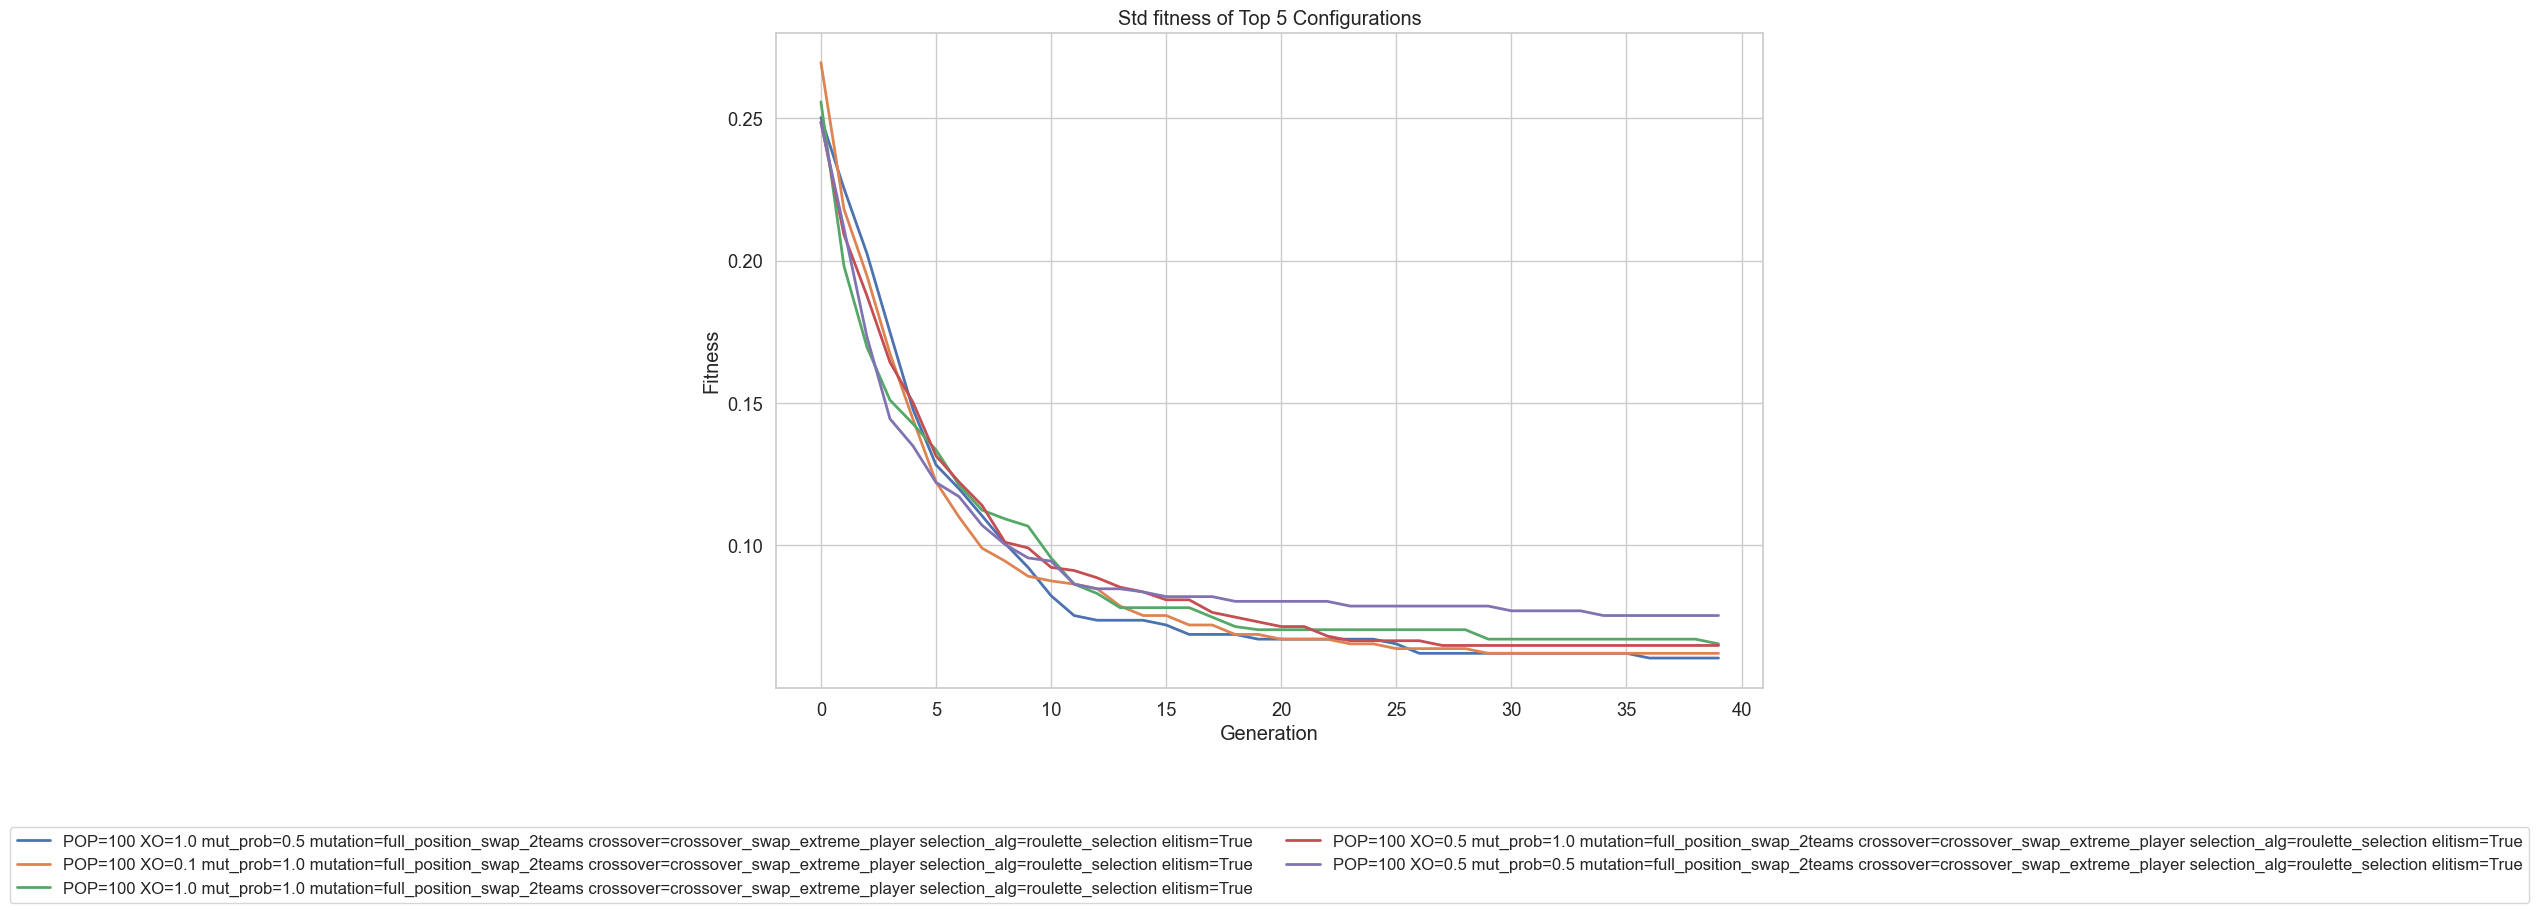

In [23]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=5, metric="std_fitness")

🔍 Key Observations:
All configurations start with high variance, reflecting high diversity in the initial population.

As generations progress, standard deviation steadily decreases, which is expected as the population converges toward fitter solutions.

Some configurations retain slightly higher diversity (e.g., blue and green lines), which can be advantageous to avoid premature convergence.

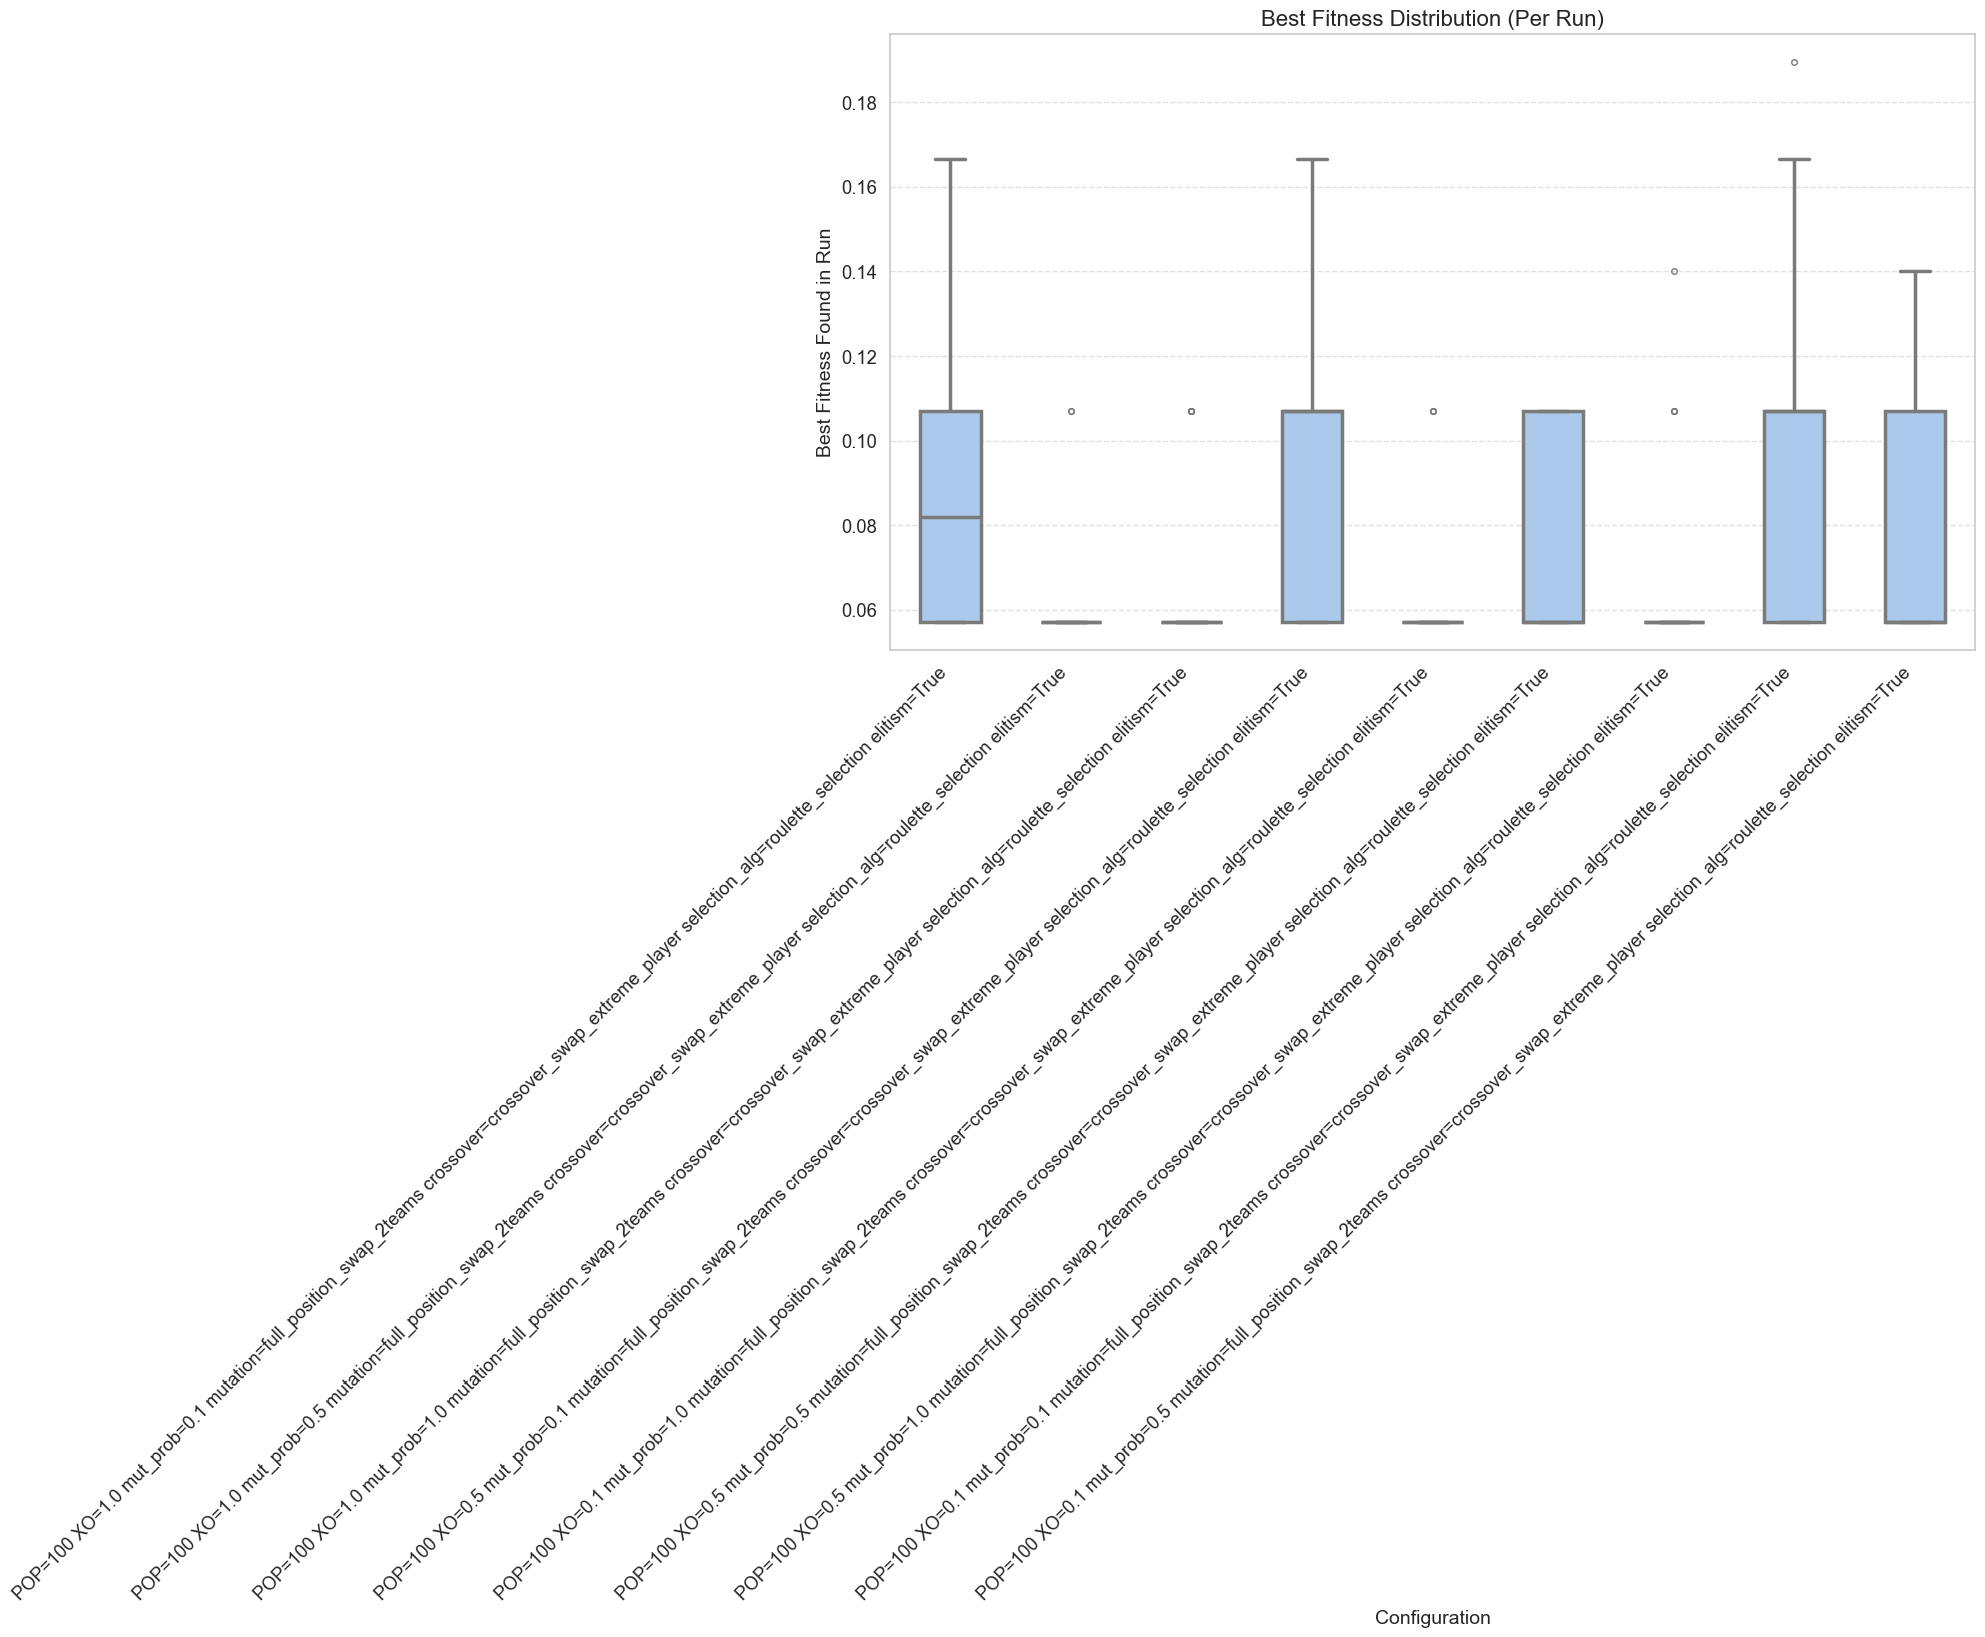

In [24]:
plot_best_fitness_boxplot(fitness_folder=fitness_path, title="Best Fitness Distribution (Per Run)")

### FINAL BEST PARAMETERS CONFIGURATION

| Parameter           | Value                           |
| ------------------- | ------------------------------- |
| Population Size     | 100                             |
| Crossover Prob (XO) | **0.5**                         |
| Mutation Prob       | **0.1**                         |
| Mutation Operator   | `full_position_swap_2teams`     |
| Crossover Operator  | `crossover_swap_extreme_player` |
| Selection Algorithm | `roulette_selection`            |
| Elitism             | **True**                        |



Achieved the highest number of statistically significant wins (4).

May not have had the absolute lowest fitness in every run, but was consistently better than others, which is statistically meaningful.

Shows robust performance across multiple seeds and settings.

A great choice if you value consistency and confidence in generalizing.

This configuration achieved the highest number of statistically significant wins in post hoc tests (4 wins), demonstrating its ability to consistently outperform other setups across multiple runs.

While it did not always yield the lowest fitness score, its strength lies in robustness and generalizability. It delivered stable performance across different seeds and conditions, making it a reliable choice for practical deployment.

If the goal is to strike a balance between strong performance and consistent outcomes, this configuration offers the most statistically trustworthy results in the tested set.